<a href="https://colab.research.google.com/github/HarshalPawar88/Evaluation-Projects/blob/main/Global_Power_Plant_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Power Plant Database

### Problem Statement:

**The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.**

**In this dataset we need to make two predictions**

- **Fuel Type**

- __capacity_mw__ 

__First we will predict capacity_mw prediction, since the target variable "capacity_mw" has continuous data so it is a "Regression problem". After this will move to Fuel Type prediction which is "Classiication problem".__

### Importing necessry Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing Dataset

In [5]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


The dataset contains the detalis of Global Power Plant. This dataset is comprised of 25 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [6]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Showing first five rows of the column

#Primary Inspection and Exploratory Data Analysis (EDA)

In [8]:
# Checking the dimension of dataset 
df.shape

(908, 25)

The dataset contains 908 rows and 25 columns.

In [9]:
# Checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The dataset contains different features with different data types. Here there are two types of data namely object type and float data type. We will take care of the object datatype using encoding techniques later.

In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_Type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

This gives the information about the dataset which includes indexing type, column type, no-null values and memory usage. Fron this we can notice the presence of null vlaues.

In [11]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

These are the number of unique values present in each columns.

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns. 

So let's do some feature engineering here.
### Feature Selection

In [12]:
# Checking the count of the country
df["country"].value_counts()

IND    908
Name: country, dtype: int64

There is only one country in the dataset so we can drop this as it has nothing to do with our prediction also we can drop the column country_long on this basis.

In [13]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [14]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [15]:
# Checking the count of name
df["name"].value_counts()

Sadeipali - ASPL Solar Power Plant    1
GACL Kutch Wind Farm                  1
Vaayu Ashti Wind Farm                 1
VIJAYWADA TPP-IV                      1
Rucha Soya Wind Farm                  1
                                     ..
RIHAND_Hydro                          1
SURAT GARH                            1
SHRI SHANKAR                          1
LOWER JHELUM                          1
NAGARJUNA SAGAR                       1
Name: name, Length: 908, dtype: int64

Name column has unique names for each power plant so we can drop this column.

In [16]:
df.drop("name",axis=1,inplace=True)

In [17]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

IND0000401    1
WRI1019922    1
IND0000360    1
IND0000186    1
IND0000055    1
             ..
IND0000185    1
WRI1026657    1
IND0000133    1
IND0000007    1
IND0000031    1
Name: gppd_idnr, Length: 908, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [18]:
df.drop("gppd_idnr",axis=1,inplace=True)

The columns owner has more than 65% of null values also it may not important for prediction, so we can drop it.

In [19]:
df.drop("owner",axis=1,inplace=True)

The column url also have no relation with the targets and it has nothing to do with prediction so we can drop it as well. 

In [20]:
df.drop("url",axis=1,inplace=True)

In the above steps I have dropped the columns which are irrelavent and may not required for our prediction.

In [21]:
# Checking null values in the dataframe
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

There are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

In [23]:
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

## Treating null values using imputation techniques.

Most of the columns have missing values except the target variables and the feature source.
- The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers. 

In [24]:
# Let's check the mean of the lattitude
df['latitude'].mean()  # we will rwplace the null values using this mean

21.196188863109057

In [25]:
# Filling missing values in lattitude using mean
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())

- The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [26]:
# let's check the mode of other_fuel1 
df["other_fuel1"].mode()  # we will fill the null values using its mode

0    Oil
dtype: object

In [27]:
# let's check the mode of geolocation_source columns
df["geolocation_source"].mode()  # we will fill the null values using its mode

0    WRI
dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns. Let's fill the null values of categorical columns by their respective modes

In [28]:
# Replacing the null valuee by its mode Oil
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [29]:
# Filling null values by its mode WRI
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

- The columns longitude, commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method. 

In [30]:
# Filling null values using their median values
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [31]:
# Let's check the  null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Now we have removed the null values using imputaion methods and the data is now clean. So we can move further.

In [33]:
# Checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

These are the columns present in the dataset.

In [34]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

These are the unique counts present in capacity_mw column.

In [35]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64

These are the list of the values in the column primary_fuel.

In [36]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are the unique classes present in the primary_fuel column.

### Feature Extraction

In [37]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1946.0      1
1949.0      1
1927.0      1
1937.0      1
1969.0      1
Name: commissioning_year, Length: 73, dtype: int64

These are the counts of commissioning years of the power plants. Let's do some feature engineering on this column. 

In [38]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [39]:
# Let's check the data frame after feature engineering 
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


In [40]:
# Checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age


It seems that there are no spaces in the dataset.

## Description of Dataset

In [41]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,19.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,15.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.
- The counts of columns are same which means there are no missing values present in the dataset.
- The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
- The median is bit greater than the mean in the column latitude which means it is skewed to left.
- From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.
- The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

Before visualizing the data, let's Separate categorical and numerical columns

In [42]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


These are the categorical columns in the given datatset.

In [43]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


These are the numerical columns in the dataset.

# Data Visualization

## Univariate Analysis

### Plotting categorical columns

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64


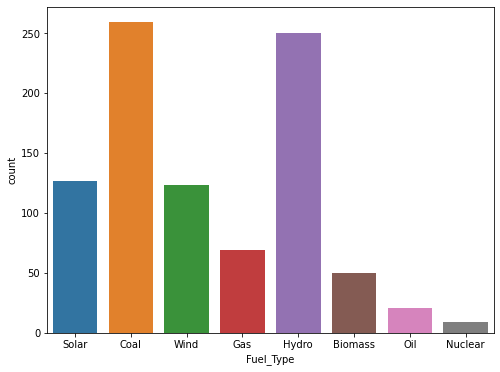

In [44]:
# Visualizing the types of fuel in primary_fuel
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["Fuel_Type"])
plt.show()

The count plot shows the energy source used in primary electricity generation . Here using the source Coal(thermal) generates more electricity followed by Hydro(water). Also the energy souce Nuclear gnerates very less electricity compare to others. The data is not balanced so will balance the data later.

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


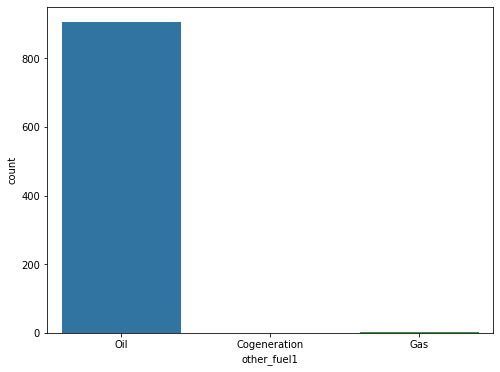

In [45]:
# Visualizing the counts of other fuel
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["other_fuel1"])
plt.show()

There are 3 uniquevalues in other_fuel1. Here as we can see the count of oil is high compare to Cogeneration and Gas.

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


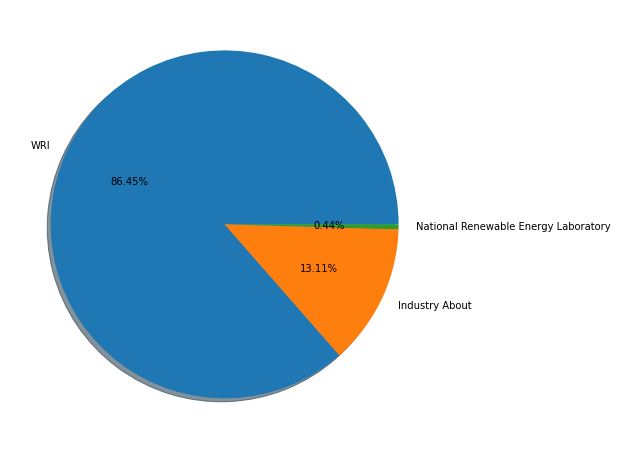

In [46]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As the plot shows the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

## Distribution of skewness

### Plotting numerical columns

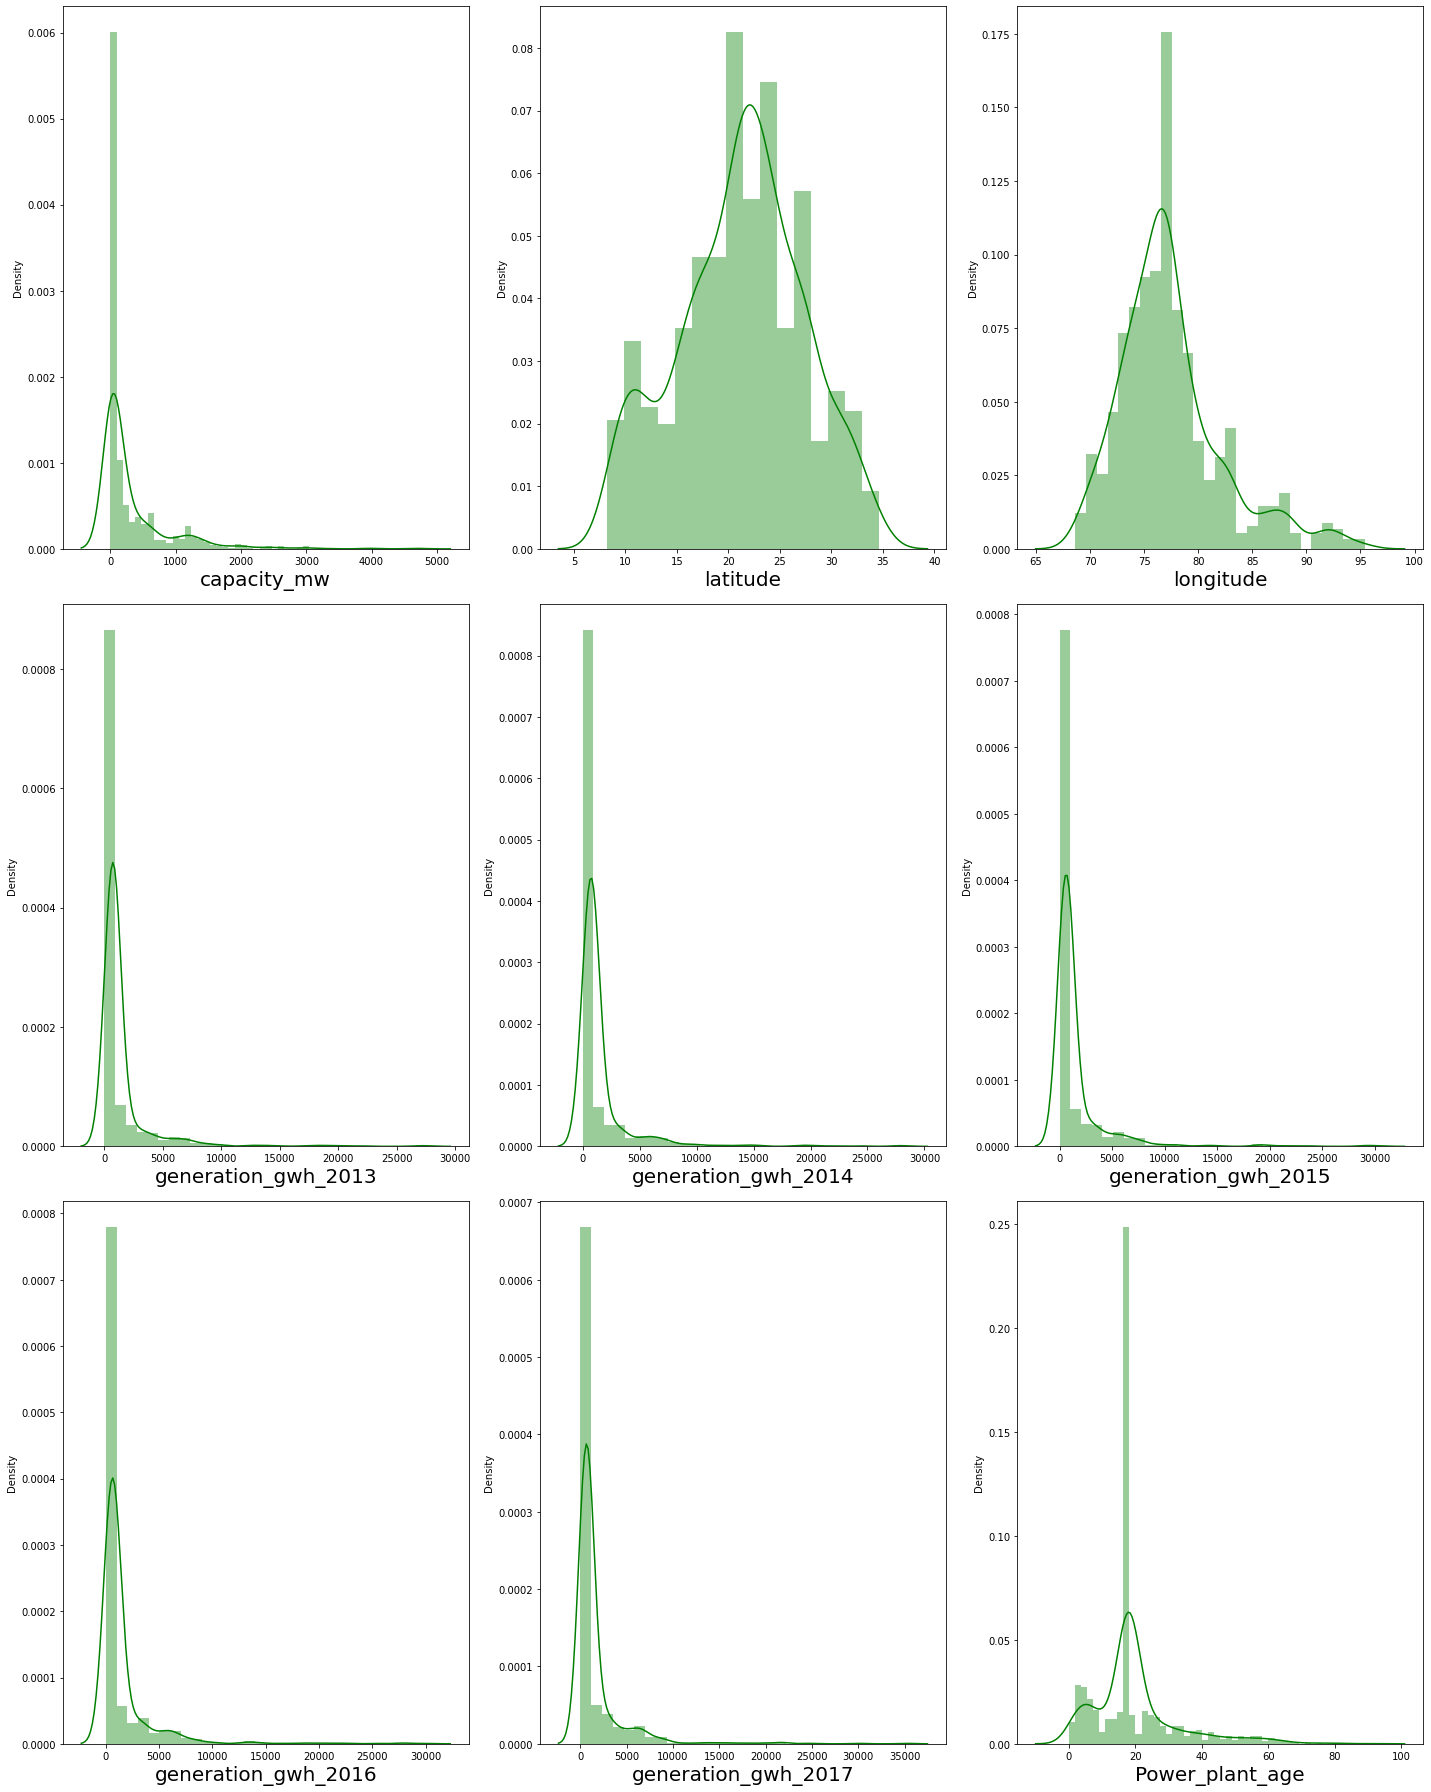

In [47]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="g")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the columns except the label in the later part.

## Bivariate Analysis

### Comparing target variable capacity_mw with features.

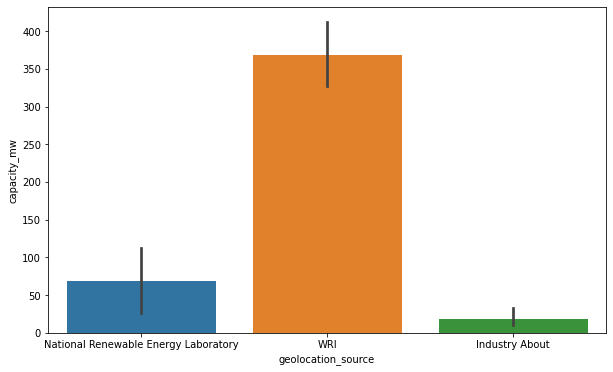

In [48]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity.

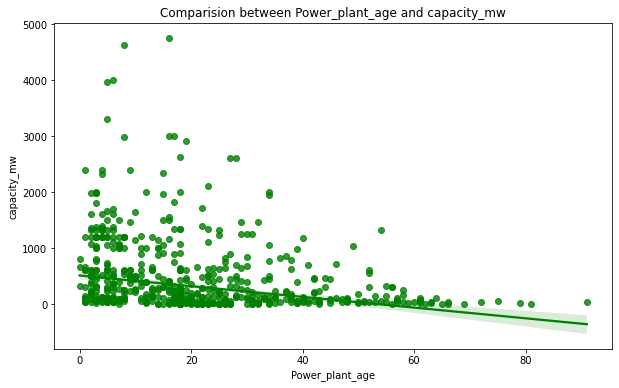

In [49]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g");

From the plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

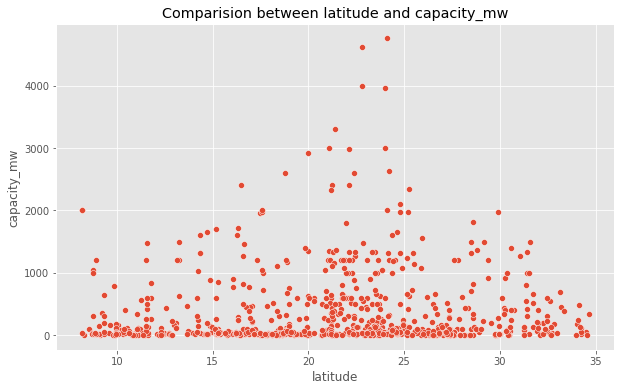

In [50]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"]);

The plot shows that there is no linear relation between latitude and capacity of the power plant. We can notice the capacity of power plant is very less in this case also we can see some outliers present here. 

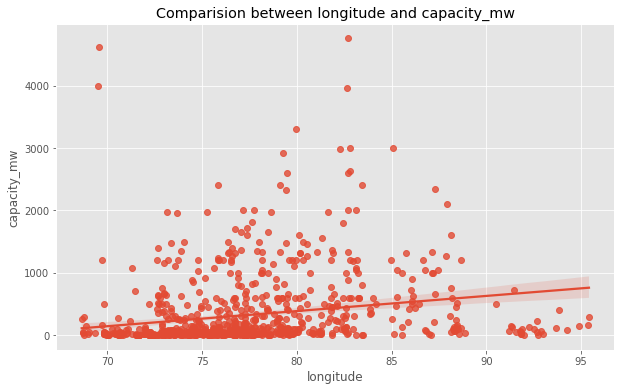

In [51]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

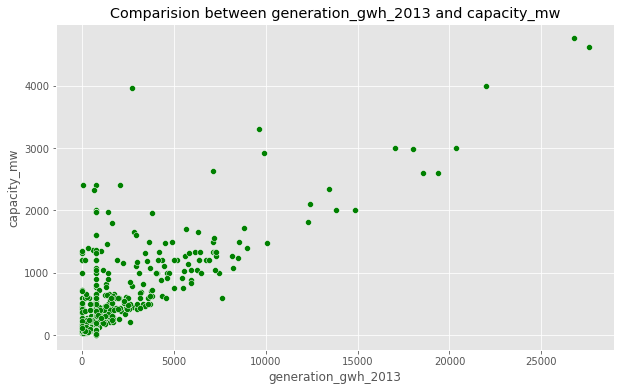

In [52]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2013 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw", data = df,color="g")
plt.show()

We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2013 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately. 

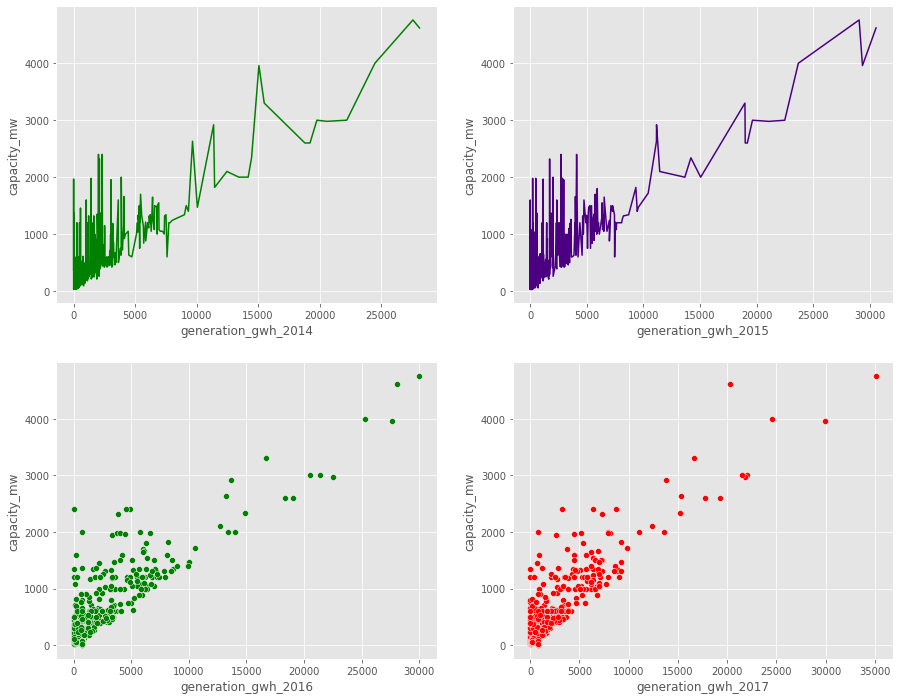

In [53]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking attrition level in Monthlyincome
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

From the above plots we can observe
- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately.

### Comparing the target variable Fuel Types with other features

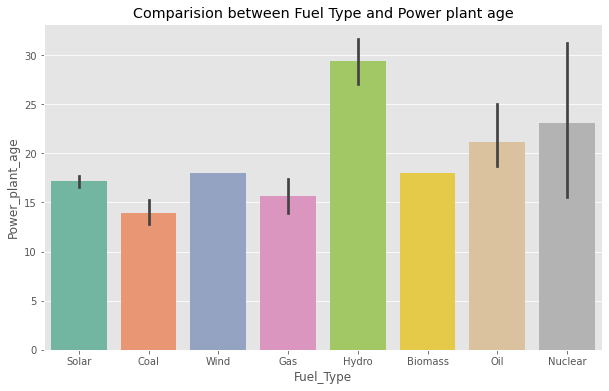

In [54]:
#Lets check how the poer plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x = "Fuel_Type", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

- From the plot we can observe that most of old power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil. 
- The power plants which are recently constructed uses coal, Solar and Gas to generate the power.

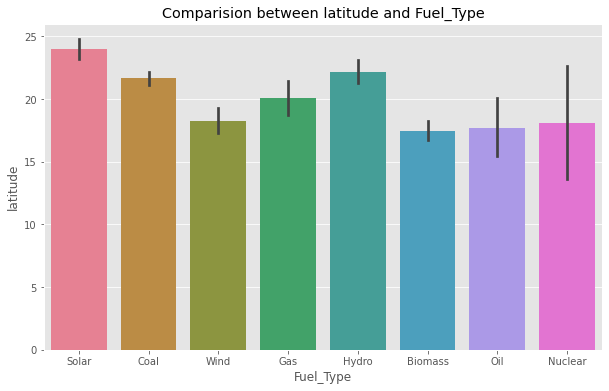

In [55]:
# Let's check how the fuel type is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['Fuel_Type'],df["latitude"],palette="husl");

- The fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

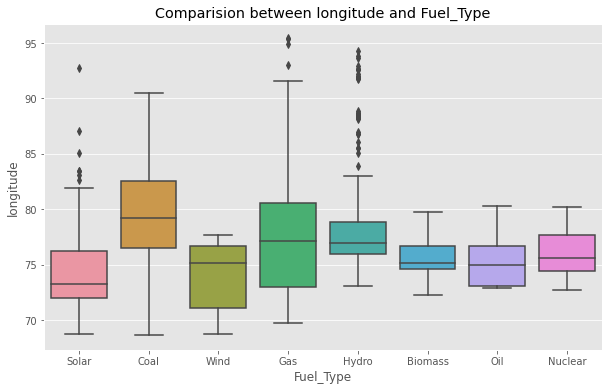

In [56]:
# Let's check how the fuel type is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and Fuel_Type')
sns.boxplot(df['Fuel_Type'],df["longitude"]);

- The fuel type Gas has high longitude followed by Hydro, Solar and Coal. Other fuel types have very less longitude.

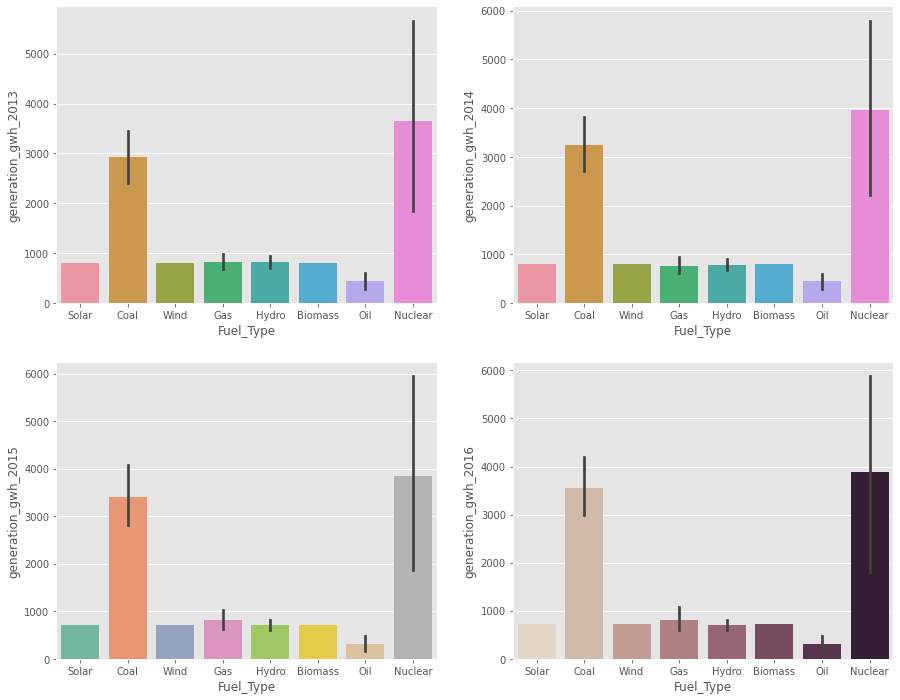

In [57]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking attrition level in Dailyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking attrition level in hourlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking attrition level in Monthlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking attrition level in Monthlyincome
sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

- From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
- Other fuel types have very less power generation reports.

### Checking the relation between targets

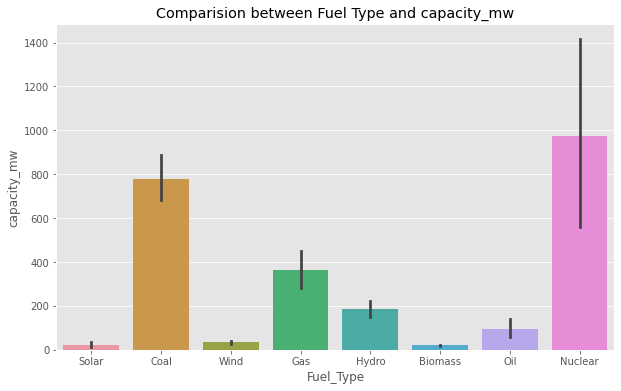

In [58]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

- The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
- Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

## Multivariate Analysis

Since we ahve two target variables capacity_mw and Fuel_Type, will check the pairwise relation for the features with both the targets separately.

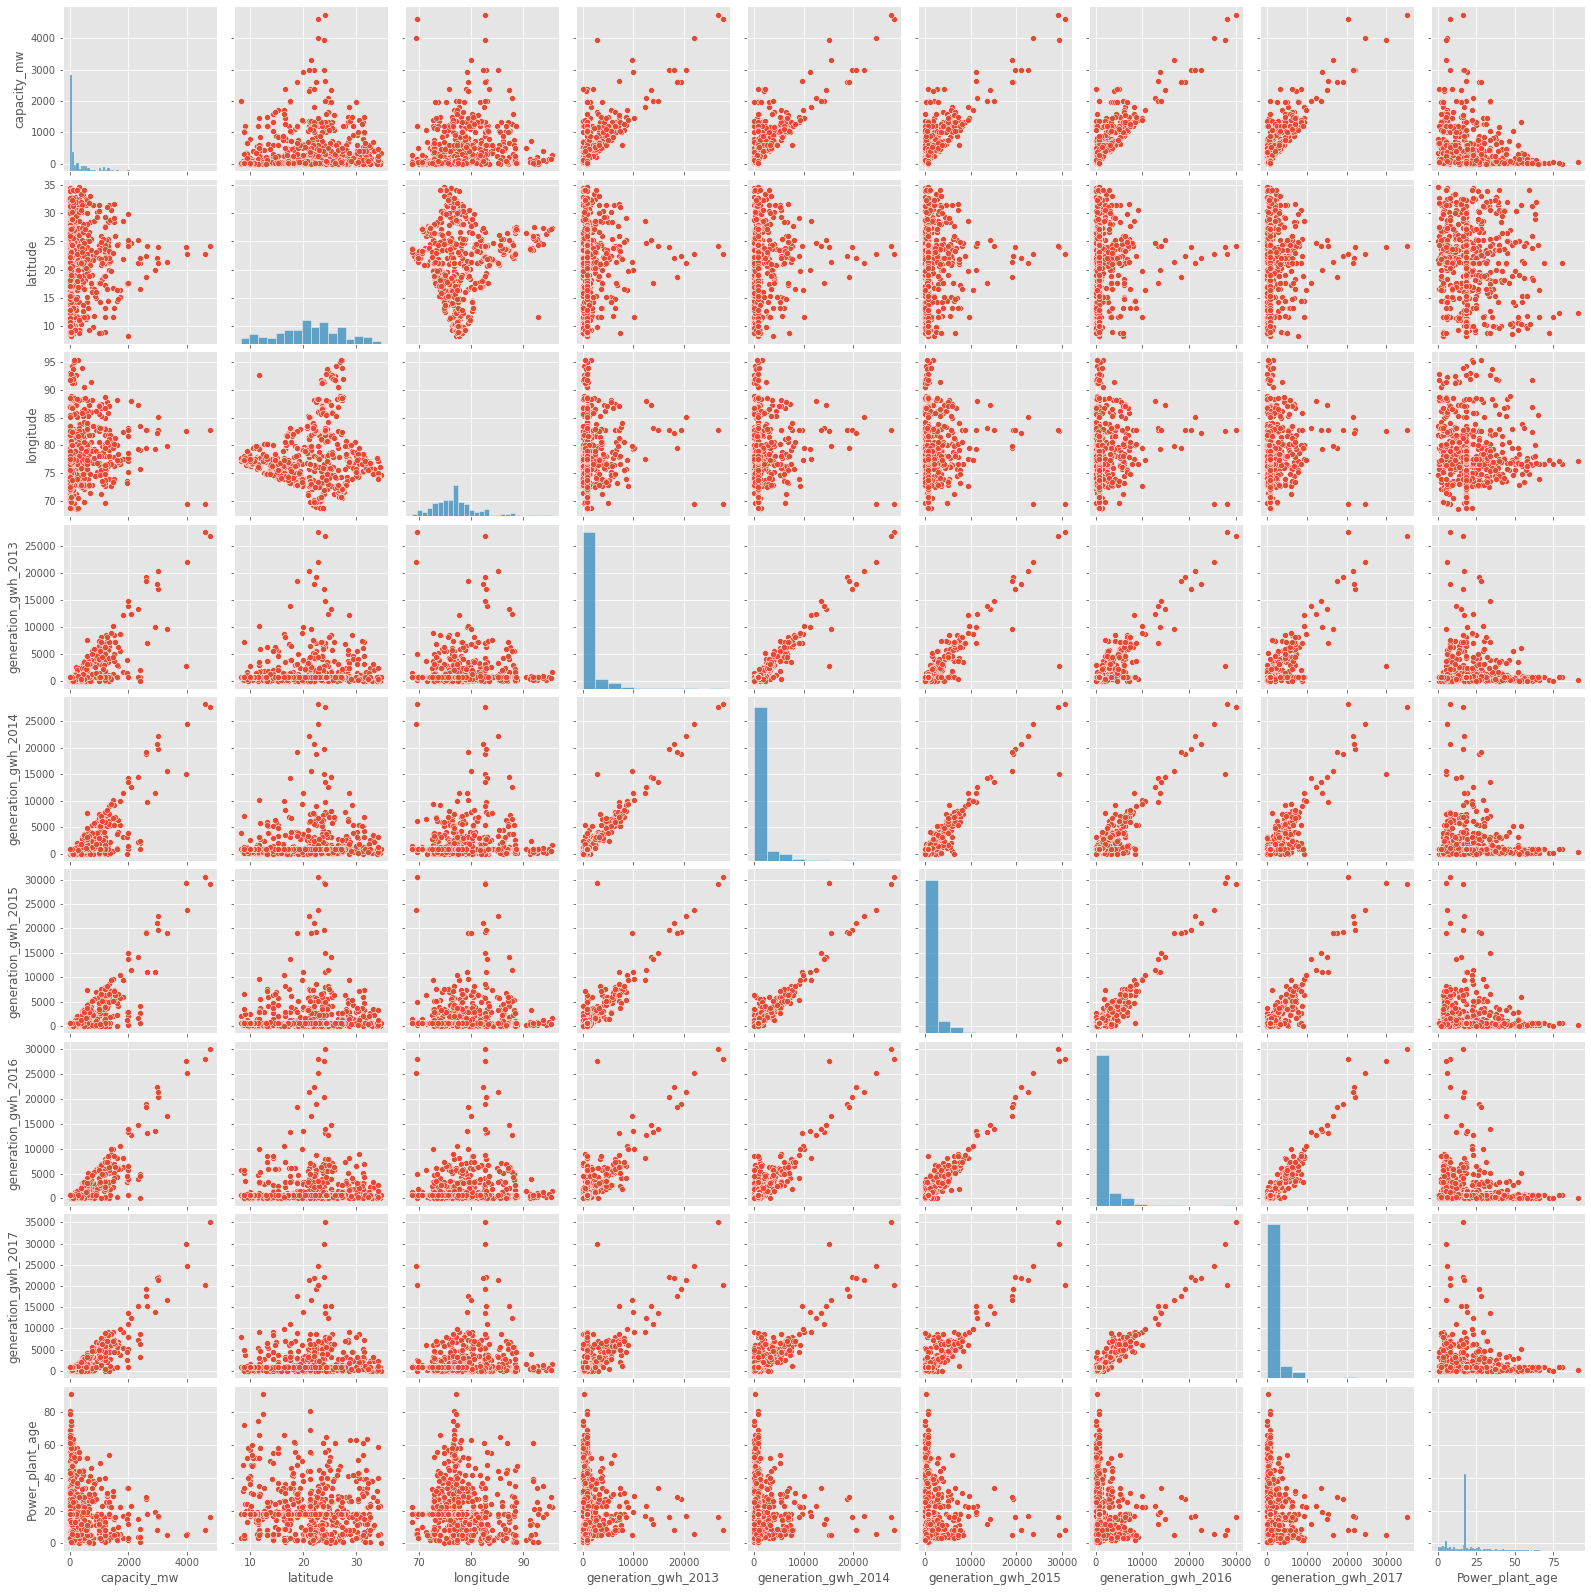

In [66]:
# Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "capacity_mw". Here we can observe the relation between the features and label.
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can also observe the outliers in some of the columns and on the diagonal we can notice the distribution plot.

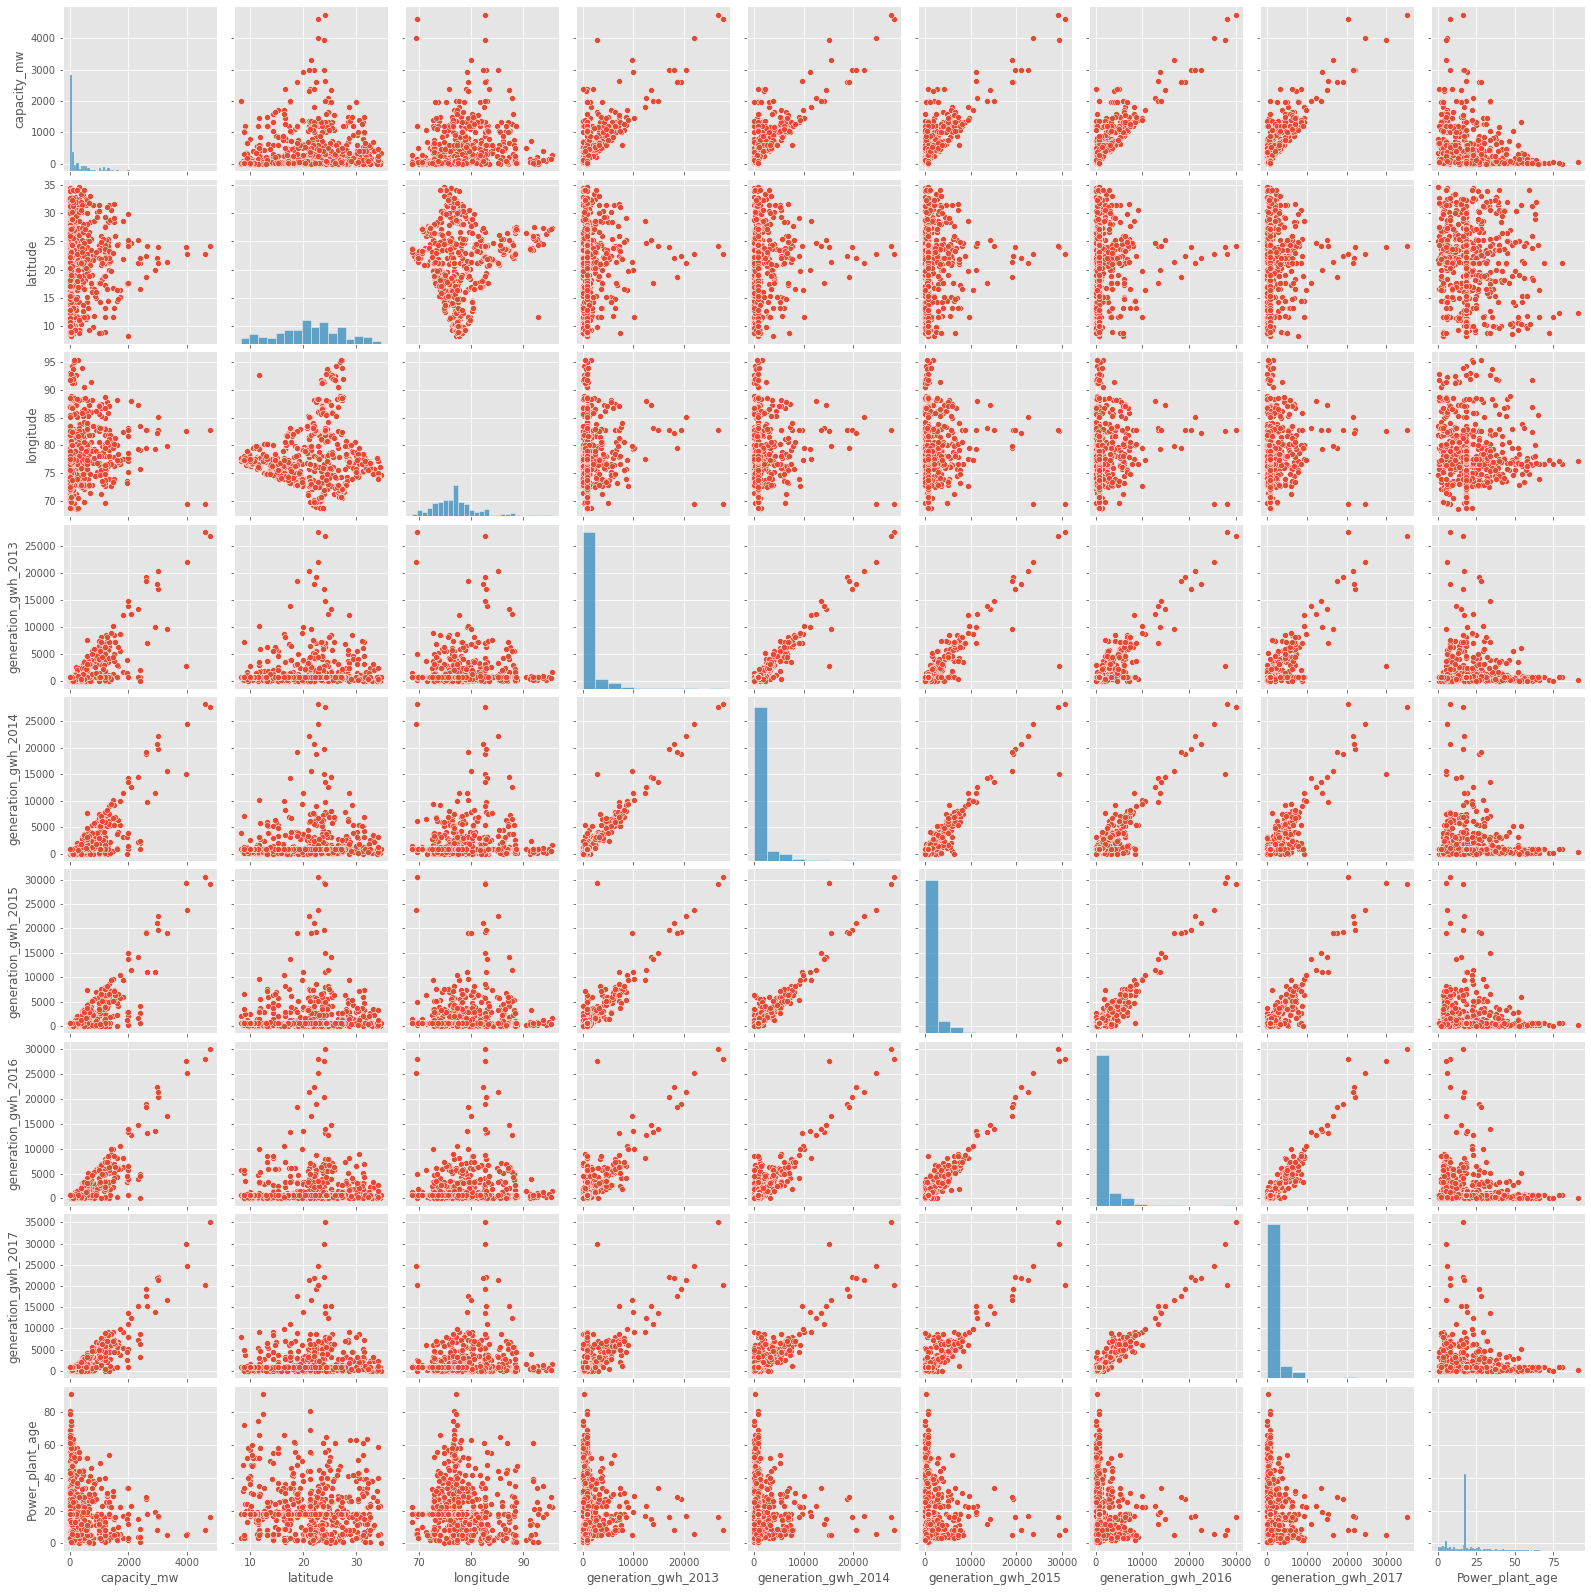

In [68]:
# Checking the pairwise relation between the features and label Fuel_Type.
sns.pairplot(df)

- This pair plot gives the pairwise relations of the features on the basis of target variable "Fuel_Type" and we can notice most of the features are highly correlated with each other.
- Most of the columns have strong linear relationship also there are huge outliers present in the columns. So will remove these outliers in the later part.

## Identifying the outliers

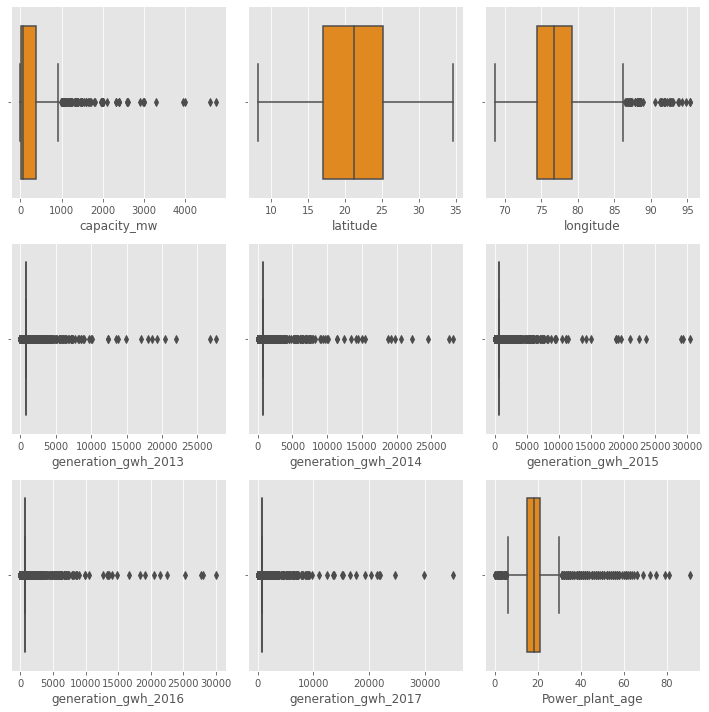

In [69]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

# Removing outliers

## 1. Zscore method

In [70]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']]

In [71]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

Now we have removed the outliers.

In [ ]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [73]:
# Shape of original dataset
df.shape

(908, 13)

Before removing the outliers we had 908 rows and 13 columns in our dataset.

In [74]:
# Shape of new dataframe
new_df.shape

(852, 13)

After removing the outliers we have 852 rows and 13 columns.

In [75]:
# Checking the the data loss
data_loss = (908-852)/908*100
data_loss

6.167400881057269

We are losing only 6% of data by removing outliers, hence we are removing outliers.

Let's remove the outliers and check data loss using IQR method.

## 2. IQR (Inter Quantile Range) method

In [76]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

We have removed the outliers using IQR method.

In [77]:
df1.shape

(422, 13)

Using IQR method the dataframe has 422 rows and 13 columns.

In [78]:
# Let's check the dataloss
data_loss = (908-422)/908*100
data_loss

53.524229074889874

Using IQR method we are losing 47% of data, so considering Zscore method for better result.

## Encoding the categorical columns using Label Encoding

In [79]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [80]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoding the categorical columns using label encoder.

In [81]:
new_df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


Now we have encoded the categorical columns using label encoding method.

## Correlation between the target variable and features using HEAT map

In [82]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
Fuel_Type,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

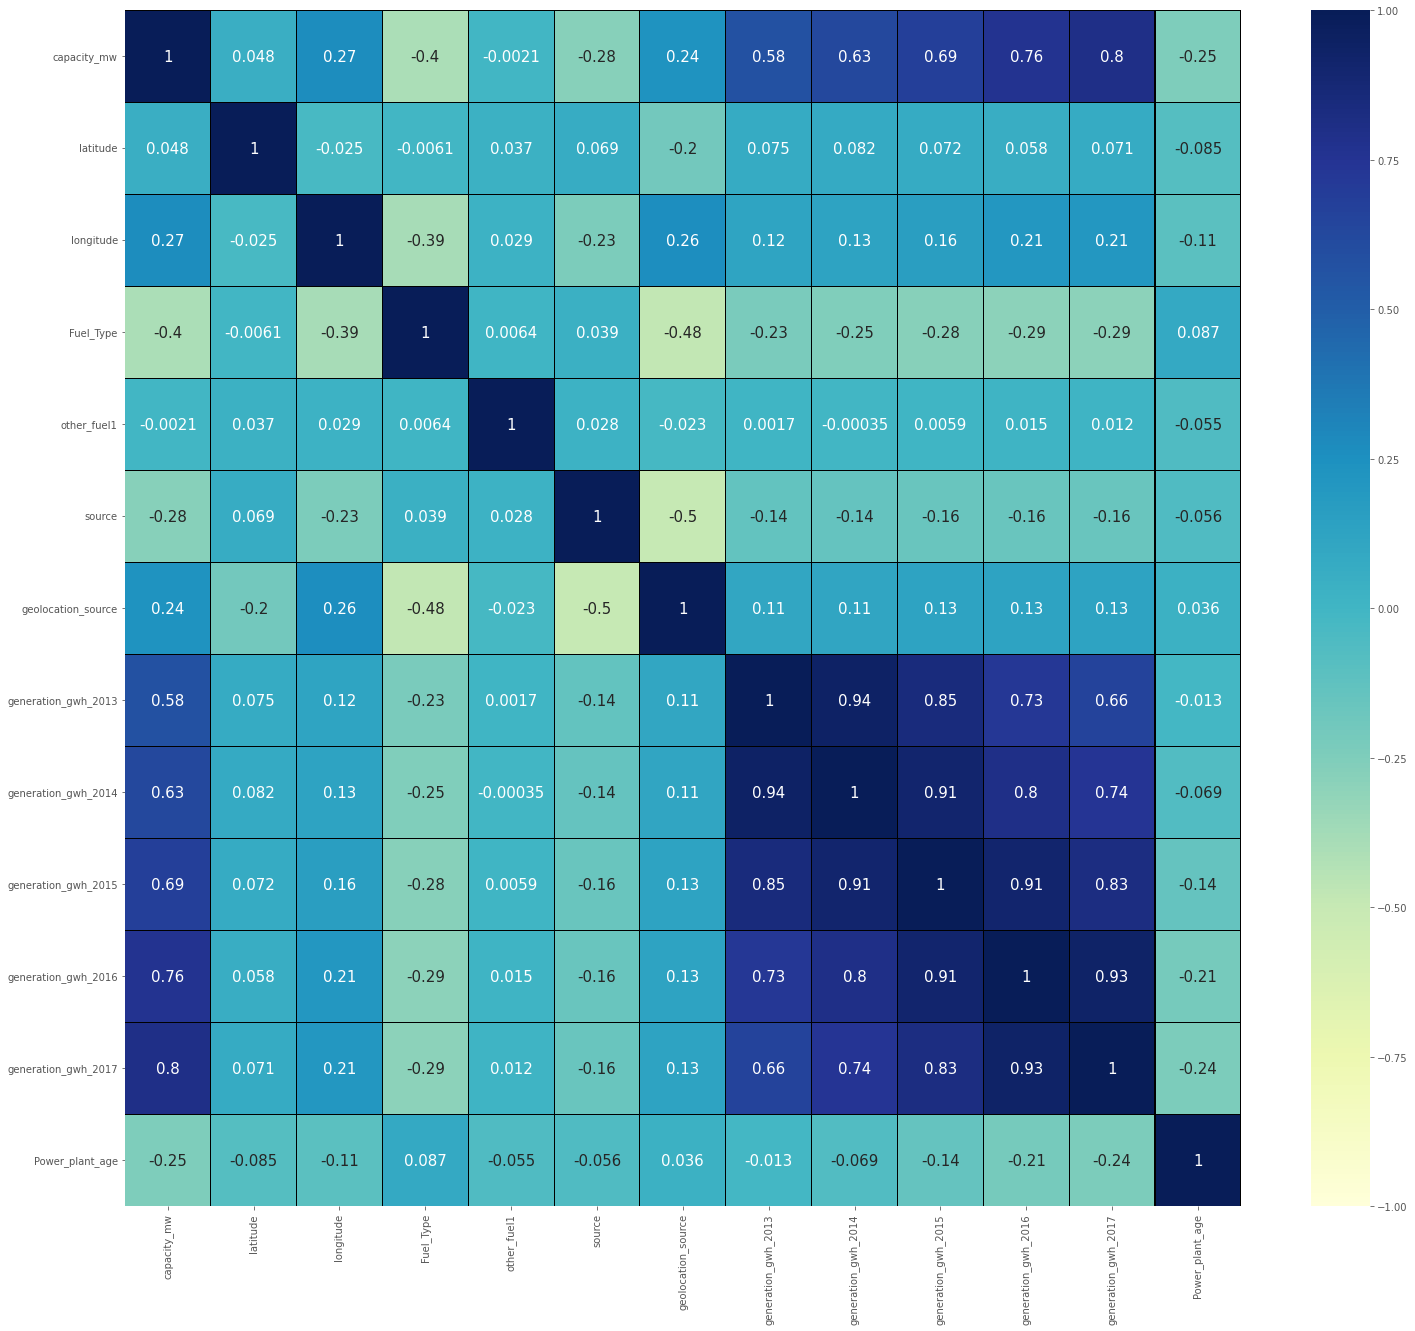

In [83]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,17))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label.
This heat mapcontains both positive and negative correlation.

### Correlation between capacity_mw and features
- The label capacity_mw is highly **positively correlated** with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013.
- And the label is **negatively correlated** with the features Fuel_Type, source and Power_plant_age.
- The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

### Correlation between Fuel_Type and features
- The label Fuel_Type is less correlated with Power_plant_age and source.
- The label is **negatively correlated** with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

- From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.
- Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

## Visualizing the correlation between label and features using bar plot

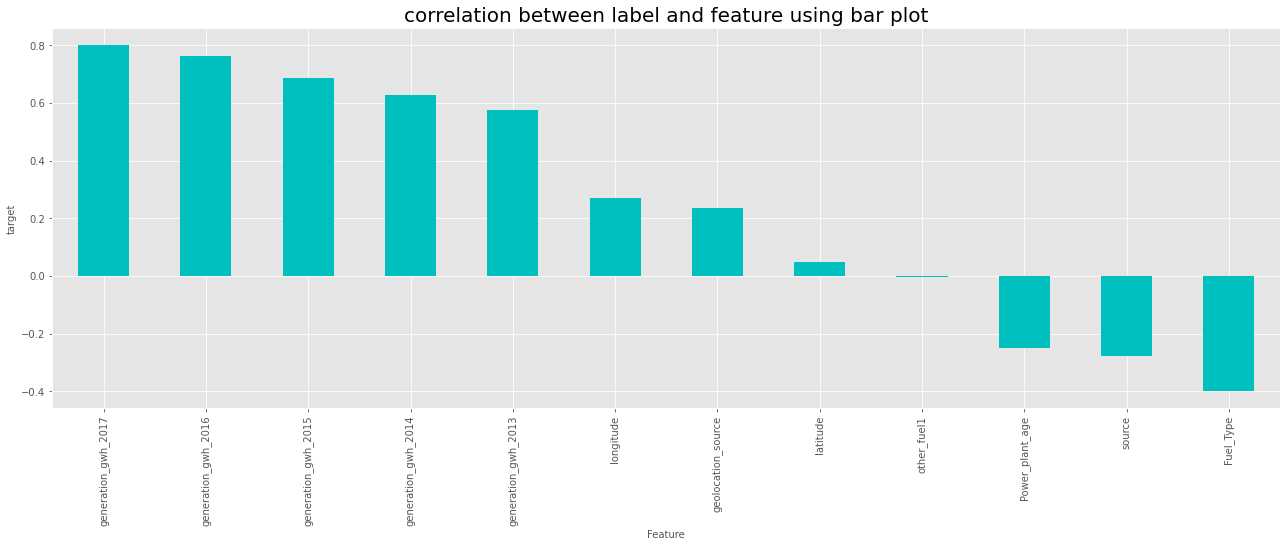

In [84]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between capacity_mw and features. Here we can easily notice the positive and negative correlation between the features and the label.

## Visualizing the correlation between label and features using bar plot

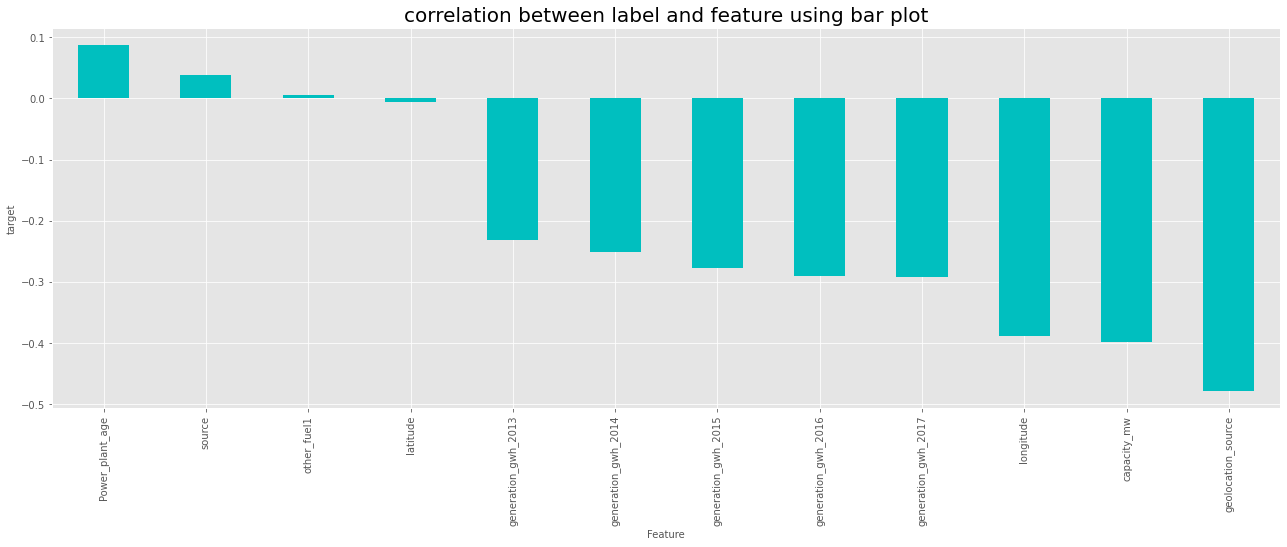

In [85]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type. Let's drop those columns.

In [86]:
# Dropping irrwlevant columns
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [87]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,73.2407,6,109,1,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,74.6090,1,174,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,69.3732,7,21,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,91.3602,2,22,2,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,82.4091,1,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


This is the dataframe after removing irrelevant columns.

# 1. Prediction for capacity_mw

## Separating the features and label variables into x and y

In [88]:
x = new_df.drop("capacity_mw", axis=1)
y = new_df["capacity_mw"]

In [89]:
# Dimension of x
x.shape

(852, 10)

In [90]:
# Dimension of y
y.shape

(852,)

## Checking for skewness

In [91]:
# Checking the skewness
x.skew()

longitude              0.888694
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

The following columns have skewness more than +0.5 and -0.5. 
- longitude
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- Power_plant_age


- Also the columns source and geolocation_source are categorical so no need to remove skewness in these columns.


## Removing skewness using yeo-johnson method

In [92]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [93]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [94]:
# Checking skewness after using yeo-johnson ethod
x.skew()

longitude              0.000077
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

I have removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical columns.

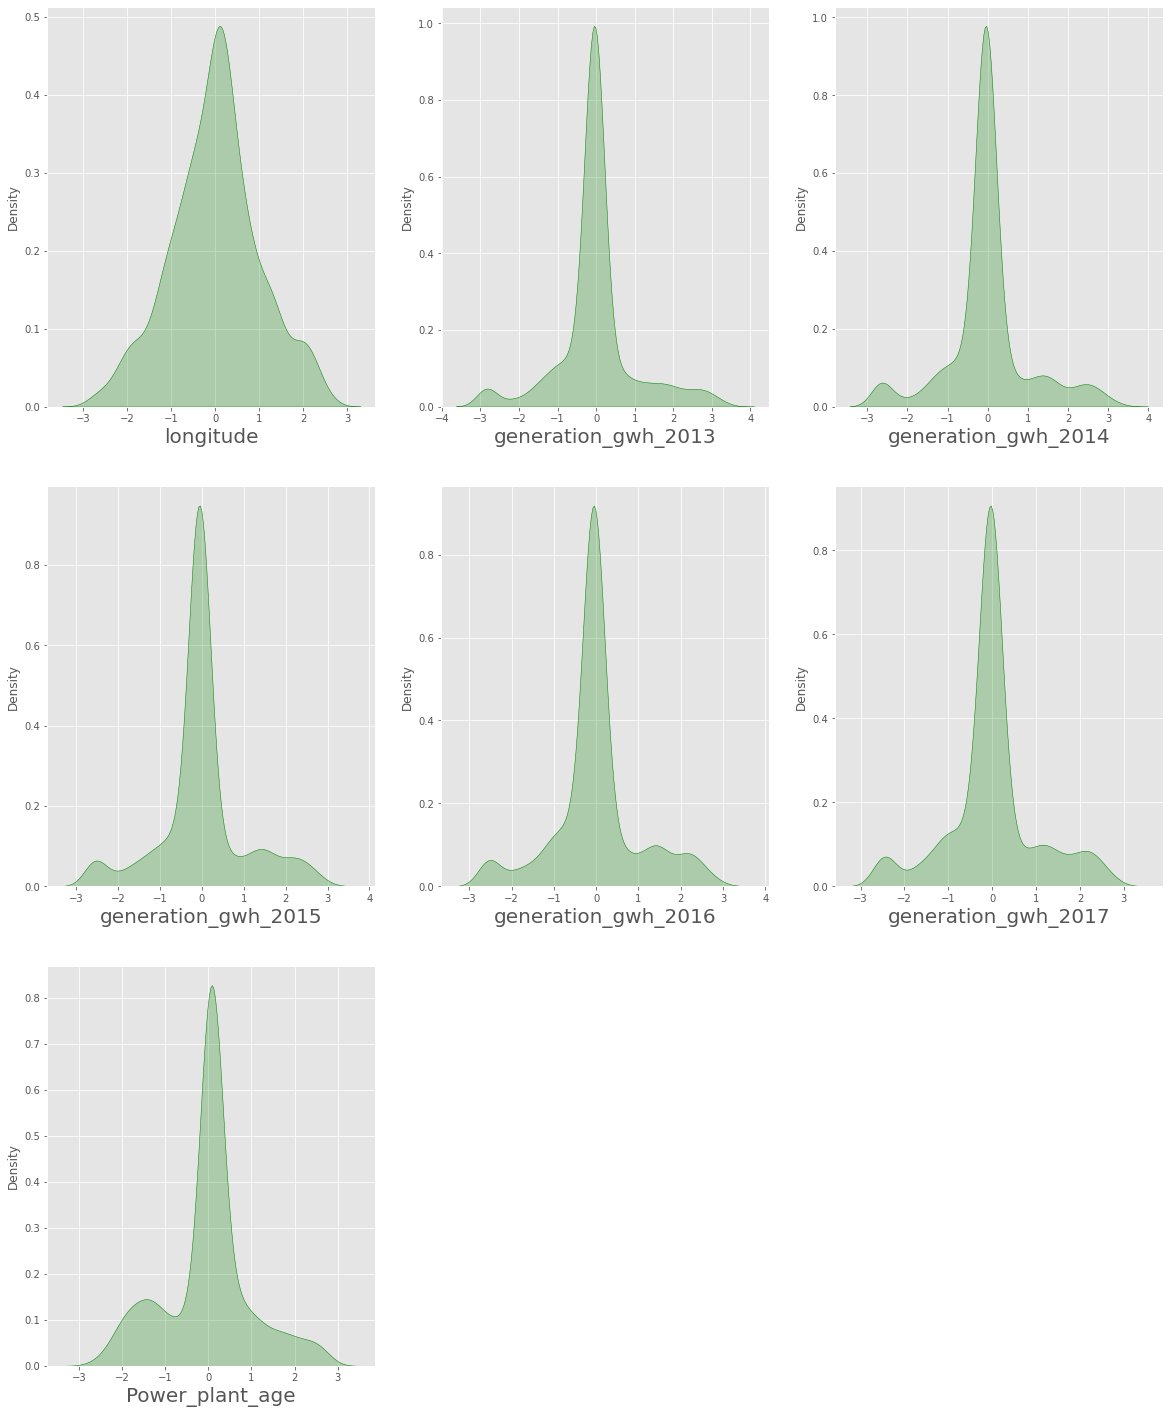

In [95]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been reduced in all the columns.

## Feature Scaling using Standard Scalarization

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,0.237064,-0.973833,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,0.429134,1.175664,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.223563,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,-0.762359,-0.973833,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

## Checking VIF(Variance Inflation Factor) values

In [97]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.313067,longitude
1,1.687238,Fuel_Type
2,1.502947,source
3,1.875104,geolocation_source
4,5.457906,generation_gwh_2013
5,7.210903,generation_gwh_2014
6,6.174992,generation_gwh_2015
7,9.656587,generation_gwh_2016
8,5.196305,generation_gwh_2017
9,1.127725,Power_plant_age


Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.

In [98]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


The dataframe after cleaning and preprocessing.

We have done with the preprocessing and data cleaning. Now let's move to build the model.

# Modeling
## Finding best random state

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8561764481390098  on Random_state  85


We are getting the maximum R2 score as 85% on the random state 85.

## Creating new train test split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Regression Algorithms

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Random Forest Regressor

In [103]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8465469370076045
MAE: 88.5016846317682
MSE: 28378.01532698248
RMSE: 168.4577553186035


The R2 score value for Random Forest Regressor model is 84.62%.

## Decision Tree Regressor

In [104]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.7442200392264504
MAE: 111.95477232142856
MSE: 47301.28878252806
RMSE: 217.48859460332181


The R2 score for Decision Tree Regressor is 73%.

## KNeighbors Regressor

In [105]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.8312159885088886
MAE: 88.30675000000001
MSE: 31213.161677207503
RMSE: 176.67247006029973


The R2 score uisng KNeighbors Regressor is 83%.

## GradientBoosting Regressor

In [106]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.8362758388801222
MAE: 93.08659624092869
MSE: 30277.445513664898
RMSE: 174.0041537253203


The R2 score for GradientBoosting Regressor model is 84.6%.

## BaggingRegressor

In [107]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_Score: 0.8511491028908349
MAE: 87.61292092037252
MSE: 27526.938578008765
RMSE: 165.91244250510198


The R2 score for BaggingRegressor is 86.4%.

## Checking the cross validation score

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7661956020709687


In [110]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.58759010255015


In [111]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7417542415978613


In [112]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7619712578270488


In [113]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7521388031170292


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

## Hyper parameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [116]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [118]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

These are the best parameter values of GradientBoosting Regressor.

In [119]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 168.4577553186035
R2_Score: 85.45849944795164


After tuning the model the R2 score is increased by 1% and we are getting R2 score as 85.76% for Random Forest Regressor which is good.

## Saving the model

In [120]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

We have saved the model using joblib.

# 2. Prediction for Fuel_type

## Separating the features and label variables into x_df and y_df

In [121]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [122]:
# Dimension of x
x_df.shape

(852, 10)

In [123]:
# Dimension of y
y_df.shape

(852,)

## Checking for skewness

In [124]:
x_df.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns. Let's remove the skewness in the numerical columns using yeo-johnson method.

## Removing skewness using yeo_johnson method

In [125]:
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [126]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [127]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.013903
longitude              0.000077
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

Now we have removed the skewness in all the numerical columns.

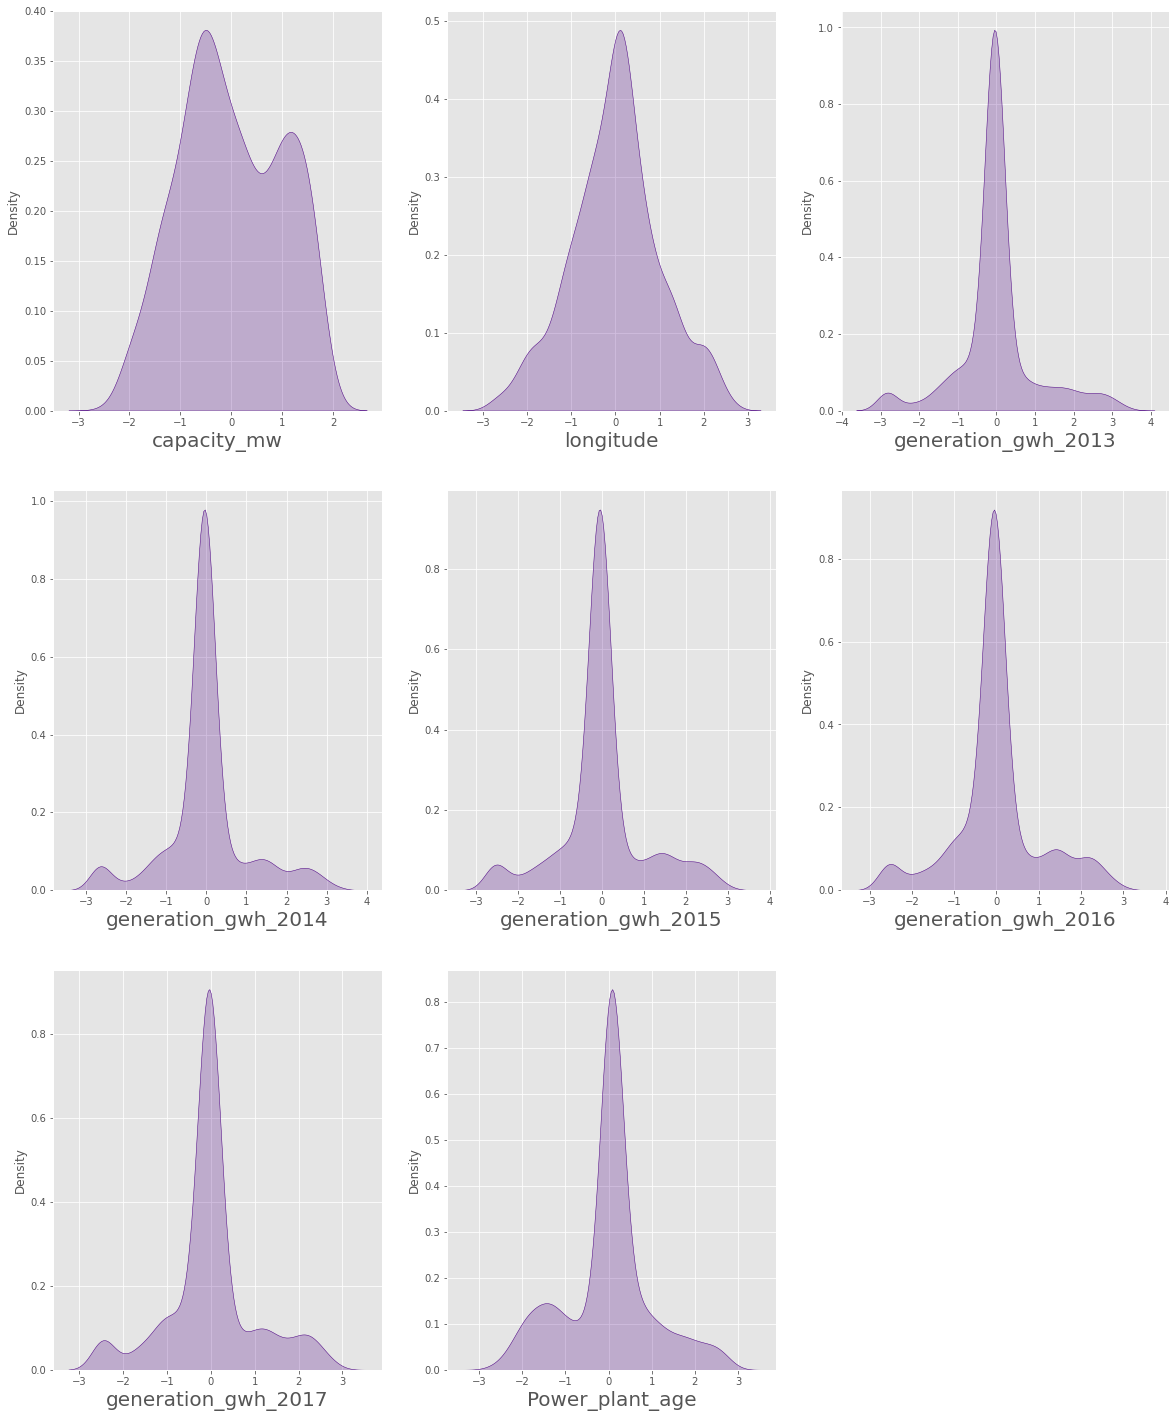

In [128]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skewness has been removed.

## Feature Scaling using Standard Scalarization

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,-1.597071,0.429134,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.513131,-0.223563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,0.105331,-0.762359,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

## Checking VIF values

In [130]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.827367,capacity_mw
1,1.199592,longitude
2,1.412236,source
3,1.588651,geolocation_source
4,5.468598,generation_gwh_2013
5,7.212366,generation_gwh_2014
6,6.182418,generation_gwh_2015
7,9.655331,generation_gwh_2016
8,5.231173,generation_gwh_2017
9,1.182482,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicollinearity problem.

In [131]:
y_df.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: Fuel_Type, dtype: int64

- Here we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem. 
- Also the data is not balanced so we will use iversampling method to balance the data.

## Oversampling

In [135]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

# Modeling

## Finding best random state

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train, y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8993055555555556  on Random_state  60


Here we have Best accuracy 88% on Random_state 35.

## Creating train_test split

In [140]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State.

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

## Decision Tree Classifier

In [142]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

#Prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test,predDTC))

0.9010416666666666
[[77  3  0  0  0  0  0  0]
 [ 3 46  8  4  2  1  0  0]
 [ 0  3 54  5  0  1  0  0]
 [ 0  6  3 50  2  3  0  0]
 [ 0  1  1  2 72  0  0  0]
 [ 1  4  1  3  0 70  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.73      0.72      0.72        64
           2       0.81      0.86      0.83        63
           3       0.78      0.78      0.78        64
           4       0.95      0.95      0.95        76
           5       0.93      0.89      0.91        79
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        80

    accuracy                           0.90       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.90      0.90      0.90       576



Here we are getting 88% accuracy using Decision Tree Classifier.

We can also observe the confusion matrix which contains True-Positive, False-Positive rate and False-Negative, True -Negative rate.

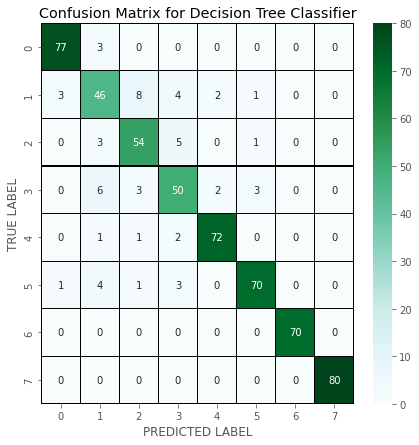

In [143]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [144]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# Prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test,predRFC))

0.9131944444444444
[[80  0  0  0  0  0  0  0]
 [ 2 42  8  4  4  4  0  0]
 [ 2  3 57  1  0  0  0  0]
 [ 0  7  4 48  1  4  0  0]
 [ 0  0  0  3 73  0  0  0]
 [ 0  2  1  0  0 76  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        80
           1       0.78      0.66      0.71        64
           2       0.81      0.90      0.86        63
           3       0.86      0.75      0.80        64
           4       0.94      0.96      0.95        76
           5       0.90      0.96      0.93        79
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        80

    accuracy                           0.91       576
   macro avg       0.91      0.90      0.90       576
weighted avg       0.91      0.91      0.91       576



The Random Forest Classifier has accuracy 90.27%.

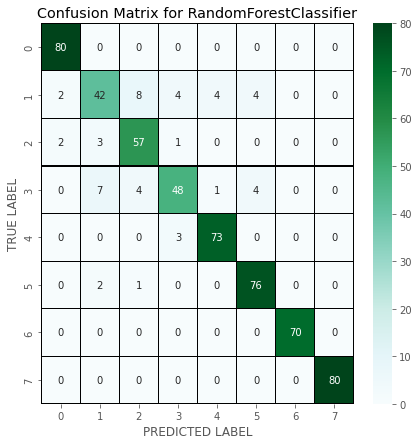

In [145]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Support Vector Machine Classifier

In [146]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.8125
[[75  0  0  0  0  0  0  5]
 [ 9 31  8  2  5  1  0  8]
 [ 3  3 39  4  1 11  0  2]
 [ 0  8 11 33  2  3  0  7]
 [ 0  0  0  3 73  0  0  0]
 [ 5  1  0  0  0 68  0  5]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  1  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        80
           1       0.72      0.48      0.58        64
           2       0.66      0.62      0.64        63
           3       0.79      0.52      0.62        64
           4       0.90      0.96      0.93        76
           5       0.82      0.86      0.84        79
           6       1.00      1.00      1.00        70
           7       0.75      0.99      0.85        80

    accuracy                           0.81       576
   macro avg       0.81      0.80      0.79       576
weighted avg       0.81      0.81      0.80       576



The accuracy using Support Vector Machine Classifier is 79.86%.

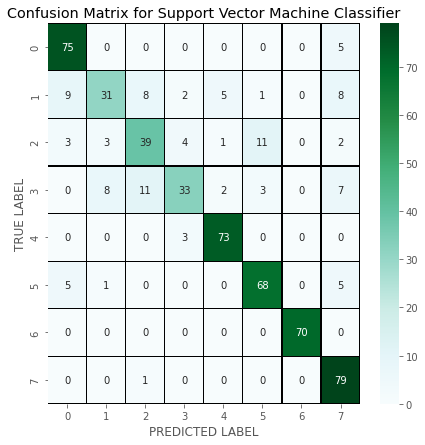

In [147]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## KNeighbors Classifier

In [148]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_df_train,y_df_train)

# Prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test,predknn))

0.8489583333333334
[[80  0  0  0  0  0  0  0]
 [ 9 28 11  1  6  3  0  6]
 [ 2  1 55  2  0  2  0  1]
 [ 0  8 12 34  2  3  0  5]
 [ 0  0  2  0 74  0  0  0]
 [ 3  0  7  0  0 69  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  1  0 79]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.76      0.44      0.55        64
           2       0.63      0.87      0.73        63
           3       0.92      0.53      0.67        64
           4       0.90      0.97      0.94        76
           5       0.88      0.87      0.88        79
           6       1.00      1.00      1.00        70
           7       0.87      0.99      0.92        80

    accuracy                           0.85       576
   macro avg       0.85      0.83      0.83       576
weighted avg       0.86      0.85      0.84       576



The accuracy using KNN is 84.89%.

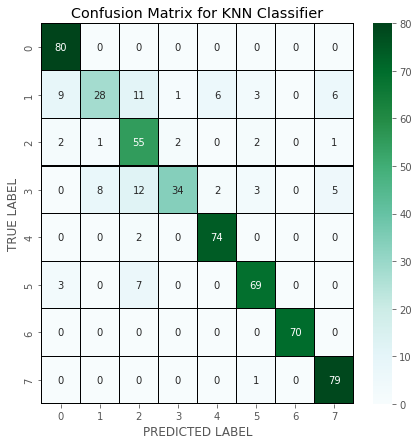

In [149]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Gradient Boosting Classifier

In [150]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.9027777777777778
[[79  0  0  0  0  1  0  0]
 [ 3 43  5  5  4  4  0  0]
 [ 1  2 58  0  0  2  0  0]
 [ 0  9  7 43  1  4  0  0]
 [ 0  1  1  3 71  0  0  0]
 [ 0  2  1  0  0 76  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        80
           1       0.75      0.67      0.71        64
           2       0.81      0.92      0.86        63
           3       0.84      0.67      0.75        64
           4       0.93      0.93      0.93        76
           5       0.87      0.96      0.92        79
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        80

    accuracy                           0.90       576
   macro avg       0.90      0.89      0.89       576
weighted avg       0.90      0.90      0.90       576



The accuracy using Gradient Boosting Classifier is 89.23%.

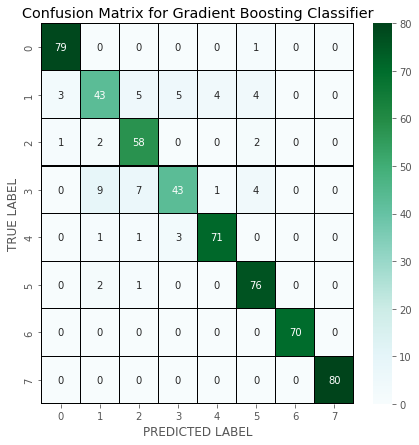

In [151]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Bagging Classifier

In [152]:
# Checking accuracy for BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# Prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test,predBC))

0.9097222222222222
[[80  0  0  0  0  0  0  0]
 [ 3 47  7  1  3  3  0  0]
 [ 1  3 55  3  0  1  0  0]
 [ 0 12  6 42  1  3  0  0]
 [ 0  0  0  3 73  0  0  0]
 [ 0  1  1  0  0 77  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        80
           1       0.75      0.73      0.74        64
           2       0.80      0.87      0.83        63
           3       0.86      0.66      0.74        64
           4       0.95      0.96      0.95        76
           5       0.92      0.97      0.94        79
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        80

    accuracy                           0.91       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.91      0.91      0.91       576



The accuracy using BaggingClassifier is 90.10%.

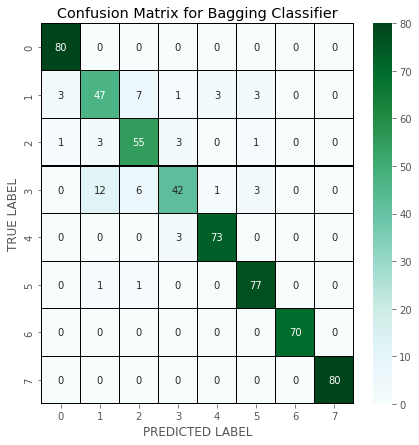

In [153]:
# Lets plot confusion matrix for Bagging Classifier
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

## Checking the Cross Validation Score

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.8598958333333334


In [156]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x_df,y_df,cv=5).mean())

0.9078125


In [157]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7927083333333333


In [158]:
# cv score for KNN Classifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.8447916666666666


In [159]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.8963541666666666


In [160]:
# cv score for BaggingClassifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.8833333333333334


Above are the cross validation score for all the models used.

### Diffrence between accuracy score and cross validation score for the models used

- Decision Tree Classifier = 1.36%
- Random Forest Classifier = 0.56%
- SVC = 0.44%
- KNeighbors Classifier = 1.04% 
- Gradient Boosting CLassifier = 0.12%
- Bagging Classifier = 0.73%

The difference between accuracy score and Cross Validation score of Gradient Boosting Classifier is 0.12% which is very less compared to other models. So we can conclude that Gradient Boosting Classifier as our best fitting model.

## Hyperparameter Tuning

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [163]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

Running GridSearchCv for Gradient Boosting Classifier.

In [ ]:
GCV.fit(x_df_train,y_df_train)

In [ ]:
GCV.best_params_

These are the best parameter values.

In [ ]:
fuel_type =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

The accuracy of the best model is increased by 2% after tuning and giving 91.66% accuracy which is good.

## Plotting ROC and compare AUC for the final model

Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the final model and is plotted False positive rate against True positive rate. Here we can observe the area of all the fuel types.

## Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

We have saved the final model using joblib.

## Conclusion

- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 85.76%.
- The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 91.66%.